In [1]:
!gdown 1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT

Downloading...
From (original): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT
From (redirected): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT&confirm=t&uuid=dafd7dcc-6c37-437b-9a1f-d5d1929cb314
To: /content/ninjacart_data.zip
100% 275M/275M [00:06<00:00, 40.5MB/s]


In [2]:
!unzip /content/ninjacart_data.zip

Archive:  /content/ninjacart_data.zip
replace ninjacart_data/test/indian market/bhl.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
train_folder='/content/ninjacart_data/train'

In [4]:
import os

In [5]:
images=[]

for folder in os.listdir(train_folder):
  # print(folder)
  for image in os.listdir(train_folder+'/'+folder):
    # print(image)
    images.append(os.path.join(train_folder,folder,image))

print(images[:10])


['/content/ninjacart_data/train/onion/onion11097.jpeg', '/content/ninjacart_data/train/onion/onion11104.jpeg', '/content/ninjacart_data/train/onion/T4VQK5FDJIPQ.jpg', '/content/ninjacart_data/train/onion/onion11027.jpeg', '/content/ninjacart_data/train/onion/FJQL1BASFF4L.jpg', '/content/ninjacart_data/train/onion/JM4FSLO4O197.jpg', '/content/ninjacart_data/train/onion/onion11176.jpeg', '/content/ninjacart_data/train/onion/P9AT7MJP8MD9.jpg', '/content/ninjacart_data/train/onion/onion1143.jpeg', '/content/ninjacart_data/train/onion/onion1186.jpeg']


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import glob
import tensorflow as tf

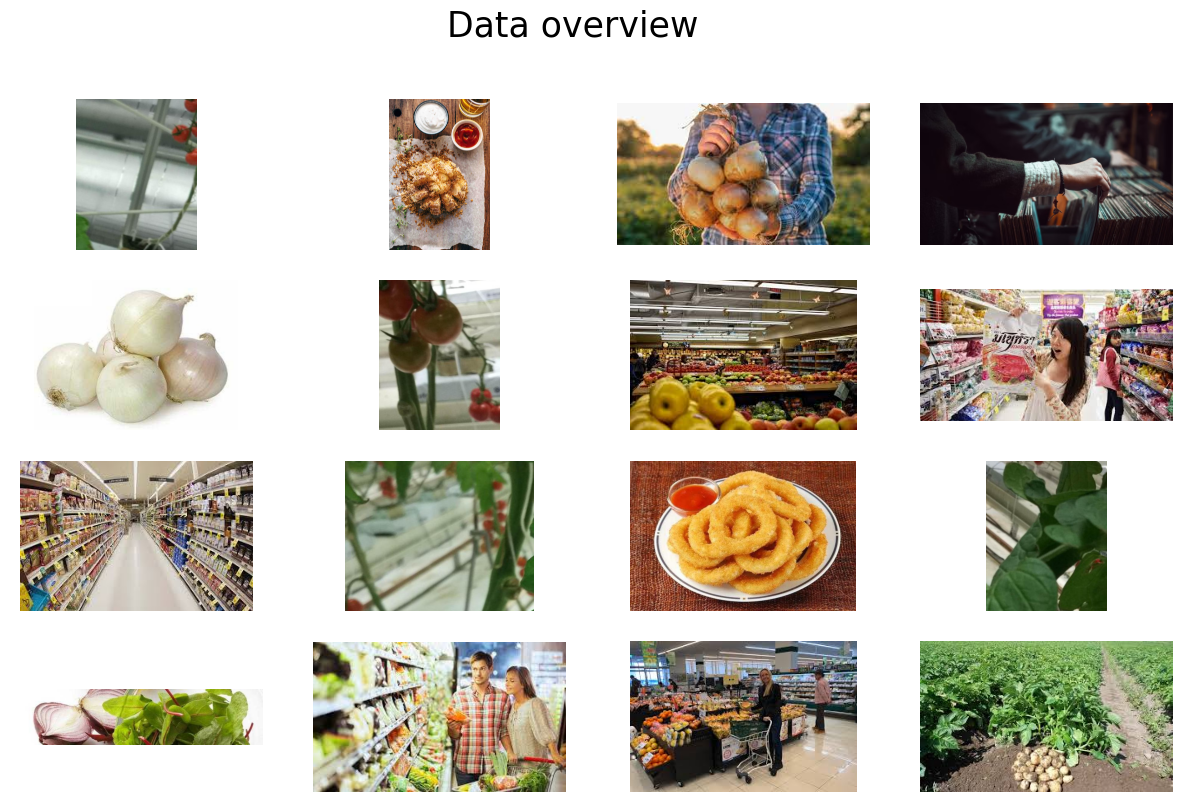

In [7]:
fig=plt.figure(figsize=(15,9))
fig.suptitle('Data overview',fontsize=25)

for i in range(16):
  random_image=random.choice(images)
  img=tf.keras.utils.load_img(random_image)
  plt.subplot(4,4,i+1)
  plt.axis('off')
  plt.imshow(img)

plt.show()


In [8]:
test_folder='/content/ninjacart_data/test'

In [9]:
img_paths=[(train_folder,'train'),(test_folder,'test')]
img_paths

[('/content/ninjacart_data/train', 'train'),
 ('/content/ninjacart_data/test', 'test')]

In [10]:
image_dict={}
count_dict={}
for path in img_paths:
  dir_path,label=path[0],path[1]
  # print(dir_path)
  # print(label)

  class_dirs=os.listdir(dir_path)

  image_dict[label]={}
  count_dict[label]={}

  for cls in class_dirs:
    file_paths=glob.glob(f"{dir_path}/{cls}/*")
    # print(file_paths)
    count_dict[label][cls]=len(file_paths)
    # print(count_dict[label][cls])
    image_paths=random.choice(file_paths)
    image_dict[label][cls]=tf.keras.utils.load_img(image_paths)
    # print(image_dict[label][cls])

In [11]:
image_dict

{'train': {'onion': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x300>,
  'indian market': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x168>,
  'potato': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=262x192>,
  'tomato': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=500x400>},
 'test': {'onion': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x447>,
  'indian market': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1000x1500>,
  'potato': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=275x183>,
  'tomato': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=400x500>}}

In [12]:
count_dict

{'train': {'onion': 849, 'indian market': 599, 'potato': 898, 'tomato': 789},
 'test': {'onion': 83, 'indian market': 81, 'potato': 81, 'tomato': 106}}

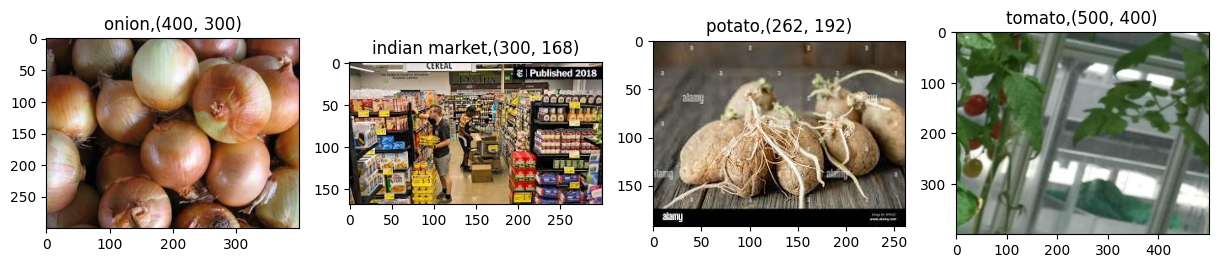

In [13]:
plt.figure(figsize=(15,7))

for i,(cls,img) in enumerate(image_dict['train'].items()):
  ax=plt.subplot(1,4,i+1)
  plt.imshow(img)
  plt.title(f'{cls},{img.size}')

In [14]:
import pandas as pd
import numpy as np


count of training samples per class:
            class  count
0          onion    849
1  indian market    599
2         potato    898
3         tomato    789 



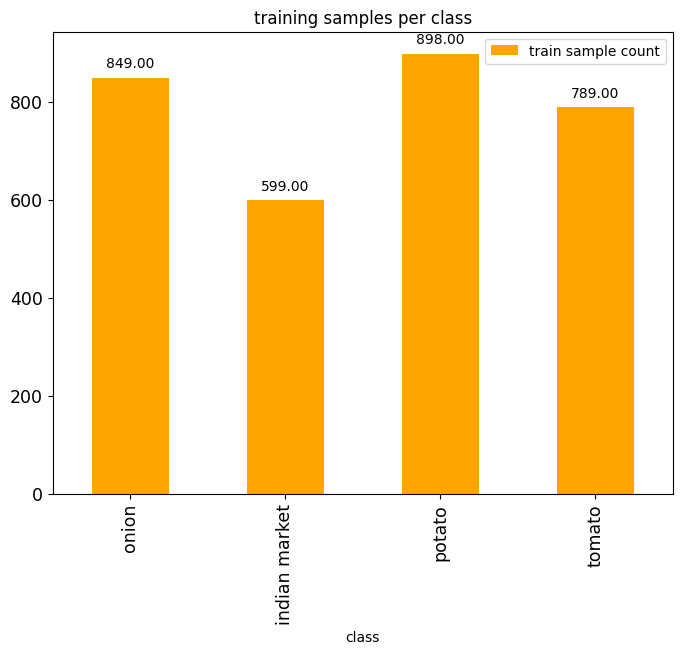


count of testing samples per class:
            class  count
0          onion     83
1  indian market     81
2         potato     81
3         tomato    106 



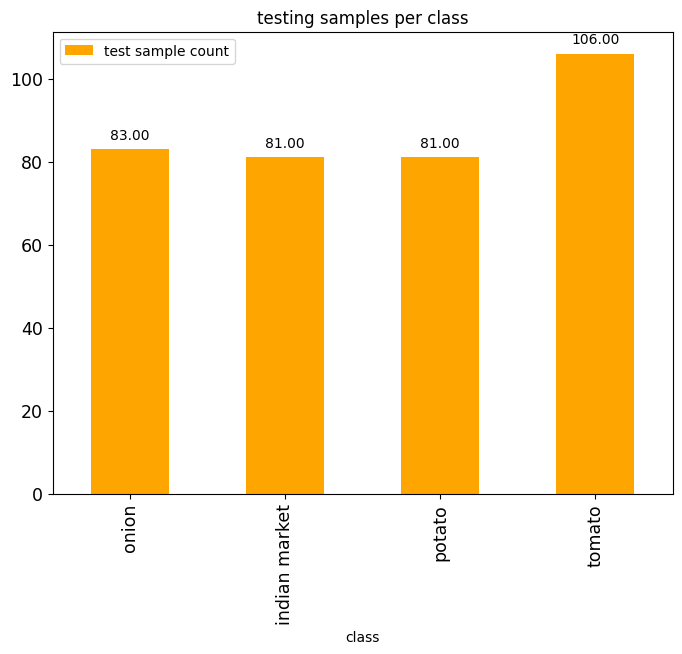

In [15]:
for data in count_dict:
  # print(count_dict[data])
  df_count=pd.DataFrame({
      'class':count_dict[data].keys(),
      'count':count_dict[data].values()
  })
  print(f'\ncount of {data}ing samples per class:\n',df_count,'\n')

  a=df_count.plot.bar(x='class',
                      y='count',
                      title=f'{data}ing samples per class',
                      label=f'{data} sample count',
                      color='orange',
                      figsize=(8,6),
                      fontsize=12.5)
  for p in a.patches:
    a.annotate(f'{p.get_height():0.2f}',(p.get_x()+p.get_width()/2.,p.get_height()),
               ha='center',va='center',xytext=(0,10),textcoords='offset points')

  plt.show()

In [16]:
image_size=(256,256)
batch_size=32
seed=2022

In [17]:
train_ds=tf.keras.utils.image_dataset_from_directory(directory=train_folder,
                                                     label_mode='categorical',
                                                     batch_size=batch_size,
                                                     image_size=image_size,
                                                     seed=seed,
                                                     validation_split=0.2,
                                                     subset='training',
                                                     shuffle=True)

Found 3135 files belonging to 4 classes.
Using 2508 files for training.


In [18]:
test_ds=tf.keras.utils.image_dataset_from_directory(directory=test_folder,
                                                    label_mode='categorical',
                                                    image_size=image_size,
                                                    batch_size=batch_size,
                                                    seed=seed)

Found 351 files belonging to 4 classes.


In [19]:
valid_ds=tf.keras.utils.image_dataset_from_directory(directory=train_folder,
                                                     label_mode='categorical',
                                                     batch_size=batch_size,
                                                     image_size=image_size,
                                                     seed=seed,
                                                     validation_split=0.2,
                                                     subset='validation')

Found 3135 files belonging to 4 classes.
Using 627 files for validation.


In [20]:
model=tf.keras.Sequential([

    tf.keras.layers.Rescaling(1./255,input_shape=(image_size[0],image_size[1],3)),

    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),

    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(4,activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy','Precision','Recall']
)

In [22]:
log_dir_1='logs/Custom_CNN_model'
tensorboard_cb=tf.keras.callbacks.TensorBoard(log_dir=log_dir_1,histogram_freq=1)

In [ ]:
history=model.fit(train_ds,epochs=20,validation_data=valid_ds,callbacks=[tensorboard_cb])

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 47s 370ms/step - Precision: 0.0396 - Recall: 5.5586e-05 - accuracy: 0.2966 - loss: 1.3633 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.6364 - val_loss: 1.1998
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 160ms/step - Precision: 0.8295 - Recall: 0.1369 - accuracy: 0.5763 - loss: 1.0967 - val_Precision: 0.8778 - val_Recall: 0.4928 - val_accuracy: 0.7161 - val_loss: 0.7891
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step - Precision: 0.8259 - Recall: 0.5593 - accuracy: 0.7217 - loss: 0.7521 - val_Precision: 0.8093 - val_Recall: 0.6093 - val_accuracy: 0.7225 - val_loss: 0.7188
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - Precision: 0.8177 - Recall: 0.6547 - accuracy: 0.7544 - loss: 0.6663 - val_Precision: 0.8067 - val_Recall: 0.6523 - val_accuracy: 0.7352 - val_loss: 0.6618
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step - Precision: 0.8113 - Recall: 0.6630 - accuracy: 0.7472 - loss: 0.6468 - val_Precision: 0.8

In [ ]:
def plot_acc_loss(model_history, n_epochs):

  fig, axes = plt.subplots(1, 2,figsize=(15,5))
  ax = axes.ravel()

  ax[0].plot(range(0, n_epochs), [acc * 100 for acc in model_history.history['accuracy']], label='Train', color='b')
  ax[0].plot(range(0, n_epochs), [acc * 100 for acc in model_history.history['val_accuracy']], label='Val', color='r')
  ax[0].set_title('Accuracy vs epoch', fontsize=15)
  ax[0].set_ylabel('Accuracy', fontsize=15)
  ax[0].set_xlabel('epoch', fontsize=15)
  ax[0].legend()

  ax[1].plot(range(0, n_epochs), model_history.history['loss'], label='Train', color='b')
  ax[1].plot(range(0, n_epochs), model_history.history['val_loss'], label='Val', color='r')
  ax[1].set_title('Loss vs epoch', fontsize=15)
  ax[1].set_ylabel('Loss', fontsize=15)
  ax[1].set_xlabel('epoch', fontsize=15)
  ax[1].legend()

  plt.show()

In [ ]:
plot_acc_loss(history,n_epochs=20)

In [ ]:
model.summary()

In [ ]:
test_images=[]

for folder in os.listdir(test_folder):
  for image in os.listdir(test_folder+'/'+folder):
    test_images.append(os.path.join(test_folder,folder,image))

test_images[:10]

In [ ]:
classes=['noise','onion','potato','tomato']

In [ ]:
def test_model(model_name):
  fig=plt.figure(1,figsize=(17,11))

  for i in range(8):
    im=tf.keras.utils.load_img(random.choice(test_images))
    im=tf.keras.utils.img_to_array(im)
    im=tf.image.resize(im,(256,256))
    im_1=tf.expand_dims(im,axis=0)

    pred=model_name.predict(im_1)
    predicted_label=tf.argmax(pred,1).numpy().item()

    for item in pred:
      item=tf.round((item*100))

    plt.subplot(2,4,i+1)
    plt.axis('off')

    plt.title(f'prediction : {classes[predicted_label]}\n\n'
    f'{item[0]} % {classes[0]}\n'
    f'{item[1]} % {classes[1]}\n'
    f'{item[2]} % {classes[2]}\n'
    f'{item[3]} % {classes[3]}\n')

    plt.imshow(im.numpy()/255)
  plt.show()

In [ ]:
test_model(model)

In [ ]:
noise_path = '/content/ninjacart_data/test/indian market'
onion_path = '/content/ninjacart_data/test/onion'
potato_path = '/content/ninjacart_data/test/potato'
tomato_path = '/content/ninjacart_data/test/tomato'

In [ ]:
def classwise_accuracy(class_path,class_name,model_name):
  paths=[]

  for path in os.listdir(class_path):
    paths.append(class_path+'/'+path)

  correct=0
  total=0

  for i in range(len(paths)):
    total+=1

    img=tf.keras.utils.load_img(paths[i])
    img=tf.keras.utils.img_to_array(img)
    img=tf.image.resize(img,(256,256))
    img=tf.expand_dims(img,axis=0)

    pred=model_name.predict(img,verbose=0)

    if tf.argmax(pred[0])==classes.index(f'{class_name}'):
      correct+=1

  print(f"Accuracy of class {class_name} is {round((correct/total)*100,2)}% consisting of {len(paths)} images")


In [ ]:
classwise_accuracy(noise_path, 'noise', model)
classwise_accuracy(onion_path, 'onion', model)
classwise_accuracy(potato_path, 'potato', model)
classwise_accuracy(tomato_path, 'tomato', model)

In [ ]:
noise, tomato, potato, onion = 0, 0, 0, 0

l1 = []
l2 = []
l3 = []
l4 = []

In [ ]:
def conf_mat(class_path, pred_list, model_name) :
    noise, tomato, potato, onion = 0, 0, 0, 0
    for i in os.listdir(class_path):

        img = tf.keras.utils.load_img(class_path + "/" + str(i))
        img = tf.keras.utils.img_to_array(img)
        img = tf.image.resize(img, (256, 256))
        img = tf.expand_dims(img, axis = 0)

        pred = model_name.predict(img, verbose=0)
        predicted = tf.argmax(pred, 1).numpy().item()

        if predicted == 0:
            noise+= 1
        elif predicted == 1:
            onion+= 1
        elif predicted == 2:
            potato+= 1
        else:
            tomato+= 1


    for item in noise, onion, potato, tomato :
        pred_list.append(item)

In [ ]:
conf_mat(noise_path, l1, model)
conf_mat(onion_path, l2, model)
conf_mat(potato_path, l3, model)
conf_mat(tomato_path, l4, model)

In [ ]:
ax = sns.heatmap(np.array([l1, l2, l3, l4]), xticklabels=classes, yticklabels=classes, annot=True, fmt='g')
ax.set(xlabel='Predicted label', ylabel='True label')
plt.show()

In [ ]:
result=model.evaluate(test_ds)
dict(zip(model.metrics_names,result))

In [ ]:
augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_veritcal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomTranslation(height_factor=0.2,width_factor=0.2)
])

aug_ds=train_ds

for image,label in aug_ds:
  image=augmentation(image)

In [ ]:
model_revamp=tf.keras.Sequential([

    tf.keras.layers.Rescaling(1./255,input_shape =(image_size[0], image_size[1], 3)),

    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),

    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(rate=0.2),

    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model_revamp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                     loss=tf.keras.losses.CategoricalCrossentropy(),
                     metrics=['accuracy','Precision','Recall'])

In [ ]:
log_dir_2='logs/Custom_CNN_revamp'
checkpoint_path = "CNN_best.keras"
tensorboard_cb=tf.keras.callbacks.TensorBoard(log_dir=log_dir_2,histogram_freq=1)
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_best_only=True)
early_stopping_cb=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [ ]:
history_1=model_revamp.fit(train_ds,
                           epochs=20,
                           validation_data=valid_ds,
                           callbacks=[tensorboard_cb,checkpoint_cb,early_stopping_cb])

In [ ]:
result_1=model_revamp.evaluate(test_ds)
dict(zip(model_revamp.metrics_names,result_1))

In [ ]:
l1 = []
l2 = []
l3 = []
l4 = []

conf_mat(noise_path, l1, model_revamp)
conf_mat(onion_path, l2, model_revamp)
conf_mat(potato_path, l3, model_revamp)
conf_mat(tomato_path, l4, model_revamp)

ax = sns.heatmap([l1, l2, l3, l4], xticklabels = classes, yticklabels = classes, annot = True, fmt = 'g')
ax.set(xlabel = 'Predicted label', ylabel = 'True label')
plt.show()

In [ ]:
plot_acc_loss(history_1,n_epochs=20)